# Gross-Pitaevskii equation with external magnetic field

We solve the 2D Gross-Pitaevskii equation with a magnetic field.
This is similar to the
previous example (Gross-Pitaevskii equation in one dimension),
but with an extra term for the magnetic field.
We reproduce here the results of https://arxiv.org/pdf/1611.02045.pdf Fig. 10

In [1]:
using DFTK
using StaticArrays
using Plots

Unit cell. Having one of the lattice vectors as zero means a 2D system

In [2]:
a = 15
lattice = a .* [[1 0 0.]; [0 1 0]; [0 0 0]];

Confining scalar potential, and magnetic vector potential

In [3]:
pot(x, y, z) = ((x - a/2)^2 + (y - a/2)^2)/2
ω = .6
Apot(x, y, z) = ω * @SVector [y - a/2, -(x - a/2), 0]
Apot(X) = Apot(X...);

Parameters

In [4]:
Ecut = 20  # Increase this for production
η = 500
C = η/2
α = 2
n_electrons = 1;  # Increase this for fun

Collect all the terms, build and run the model

Iter     Function value   Gradient norm 
     0     3.156269e+01     8.060653e+00
 * time: 0.004456043243408203
     1     2.791113e+01     6.222285e+00
 * time: 0.013061046600341797
     2     2.103921e+01     5.590740e+00
 * time: 0.03201913833618164
     3     1.318727e+01     1.439240e+00
 * time: 0.054354190826416016
     4     1.221232e+01     2.324665e+00
 * time: 0.06935811042785645
     5     1.159439e+01     1.751210e+00
 * time: 0.08442306518554688
     6     1.062174e+01     1.633863e+00
 * time: 0.16322898864746094
     7     1.036026e+01     1.545632e+00
 * time: 0.17844104766845703
     8     9.825648e+00     6.602327e-01
 * time: 0.19356703758239746
     9     9.475153e+00     7.219603e-01
 * time: 0.2085280418395996
    10     9.359515e+00     7.773446e-01
 * time: 0.22340106964111328
    11     9.308794e+00     3.682862e-01
 * time: 0.2384321689605713
    12     9.281073e+00     4.072182e-01
 * time: 0.2534019947052002
    13     9.256562e+00     2.348654e-01
 * time:

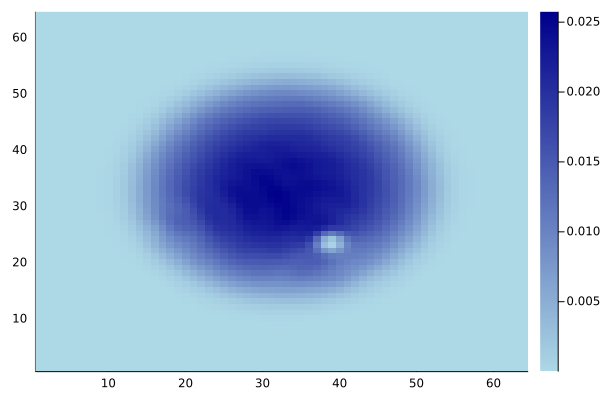

In [5]:
terms = [Kinetic(),
         ExternalFromReal(X -> pot(X...)),
         LocalNonlinearity(ρ -> C * ρ^α),
         Magnetic(Apot),
]
model = Model(lattice; n_electrons=n_electrons,
              terms=terms, spin_polarization=:spinless)  # "spinless electrons"
basis = PlaneWaveBasis(model; Ecut, kgrid=(1, 1, 1))
scfres = direct_minimization(basis, tol=1e-5)  # Reduce tol for production
heatmap(scfres.ρ[:, :, 1, 1], c=:blues)